## Clustering and PCA Assignment

#### - Submitted By - Sushant Parihar

### Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.


### Business Goal
Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [1]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')
# Import Libraries
import pandas as pd
#Visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To scale Data
from sklearn.preprocessing import scale
# To perform K-means clustering
from sklearn.cluster import KMeans
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Step 1: Reading and Understanding the Data

In [2]:
# Importing Country Data Set
country = pd.read_csv(r"Country-data.csv")
# Checking the Data
country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
country.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [4]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
country.shape

(167, 10)

In [6]:
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Step 2: EDA and Visualising the Data 

In [7]:
#dataset for categorical variable 
cx=pd.Series(country['country'].astype('category'))

In [8]:
# Converting the imports,exports and health spending from percentage value to absolute values
country['exports']=country['exports']*country['gdpp']/100
country['imports']=country['imports']*country['gdpp']/100
country['health']=country['health']*country['gdpp']/100

In [9]:
country.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

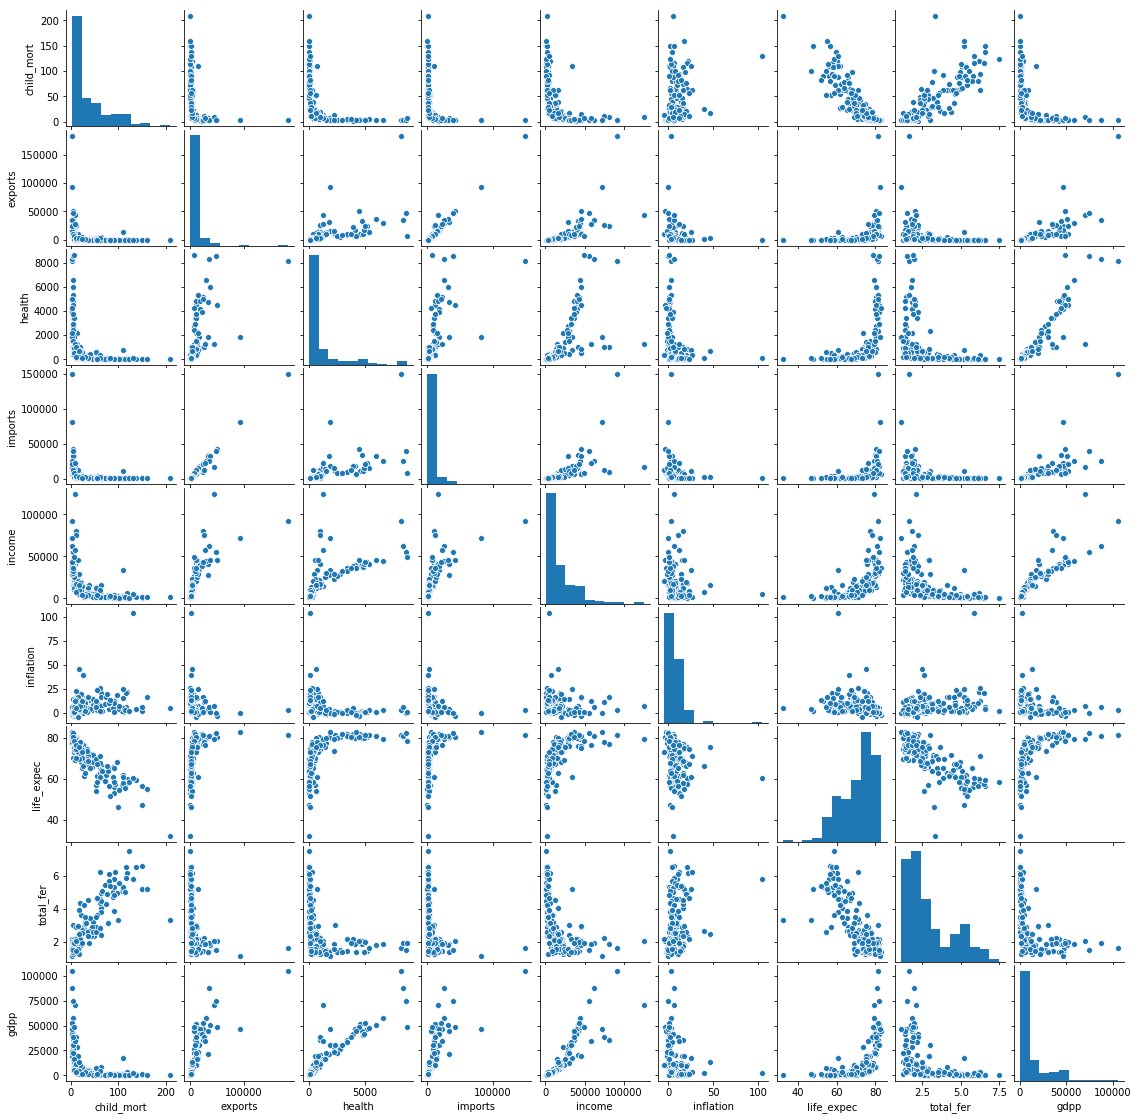

In [10]:
pp= sns.pairplot(country,height=10, aspect=0.5)
pp.fig.set_size_inches(15,15)
plt.show()

In [11]:
country_numeric=country.select_dtypes(['float64','int64'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236A2A012B0>,
      dtype=object)

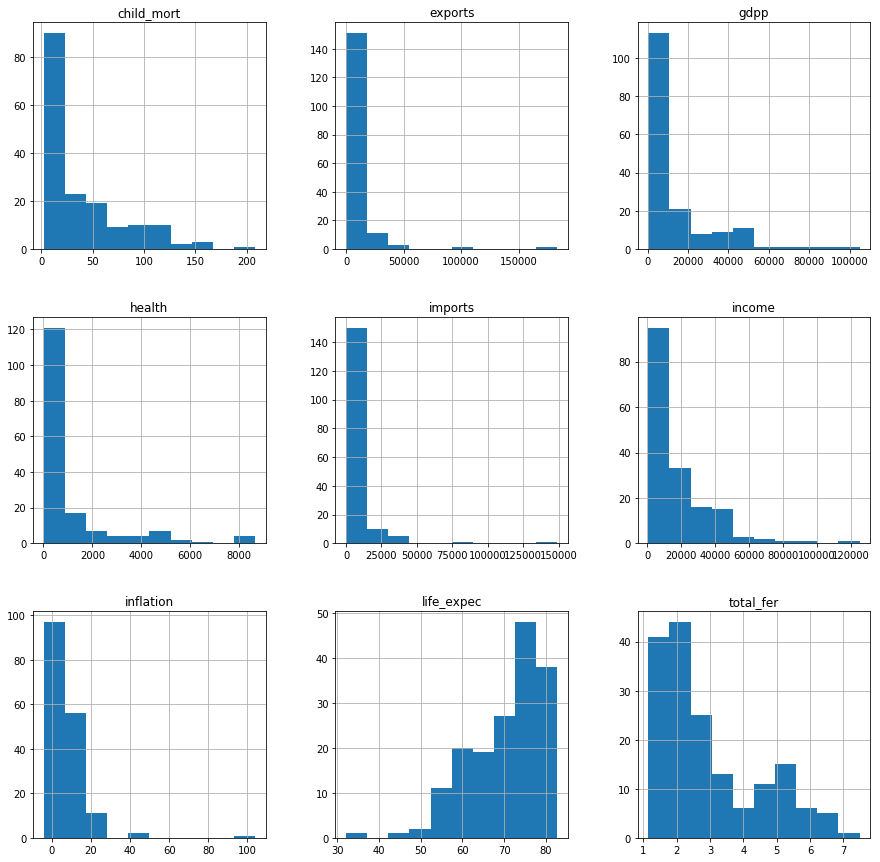

In [12]:
country_numeric[country_numeric.columns].hist(figsize=(15,15))

In [13]:
country_numeric.corr()

child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.297230 -0.430438 -0.319138 -0.524315   0.288276   
exports      -0.297230  1.000000  0.612919  0.987686  0.725351  -0.141553   
health       -0.430438  0.612919  1.000000  0.638581  0.690857  -0.253956   
imports      -0.319138  0.987686  0.638581  1.000000  0.672056  -0.179458   
income       -0.524315  0.725351  0.690857  0.672056  1.000000  -0.147756   
inflation     0.288276 -0.141553 -0.253956 -0.179458 -0.147756   1.000000   
life_expec   -0.886676  0.377694  0.545626  0.397515  0.611962  -0.239705   
total_fer     0.848478 -0.291096 -0.407984 -0.317061 -0.501840   0.316921   
gdpp         -0.483032  0.768894  0.916593  0.755114  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.377694  -0.291096  0.768894  
health        0.545626  -0.407984  0.916593  
imports       0.397515  -0.317061  0.755114  
income        0.611962  -0.501840  0.895571  
inflation    -0.239705   0.316921 -0.221631  
life_expec    1.000000  -0.760875  0.600089  
total_fer    -0.760875   1.000000 -0.454910  
gdpp          0.600089  -0.454910  1.000000

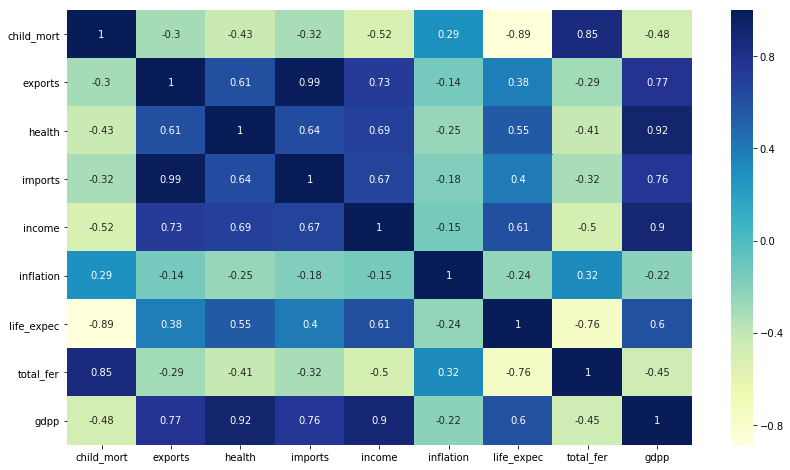

In [14]:
plt.figure(figsize=(14,8))
sns.heatmap(country_numeric.corr() , annot=True , cmap="YlGnBu")
plt.show()

We can see that income and GDP of any country is highly correlated as well as child+mort and total_fer are also dependant on each other.

## Outlier Detection

In [15]:
#checking outliers
country_numeric.describe(percentiles=[.25,.5,.75,.90,.95,.99])

child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618847  1056.733204    6588.352108   17144.688623   
std     40.328931   17973.885795  1801.408906   14710.810418   19278.067698   
min      2.600000       1.076920    12.821200       0.651092     609.000000   
25%      8.250000     447.140000    78.535500     640.215000    3355.000000   
50%     19.300000    1777.440000   321.886000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
90%    100.220000   17760.600000  3825.416000   15034.280000   41220.000000   
95%    116.000000   31385.100000  4966.701000   24241.560000   48290.000000   
99%    153.400000   64794.260000  8410.330400   55371.390000   84374.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
90%     16.640000   80.400000    5.322000   41840.000000  
95%     20.870000   81.400000    5.861000   48610.000000  
99%     41.478000   82.370000    6.563600   79088.000000  
max    104.000000   82.800000    7.490000  105000.000000

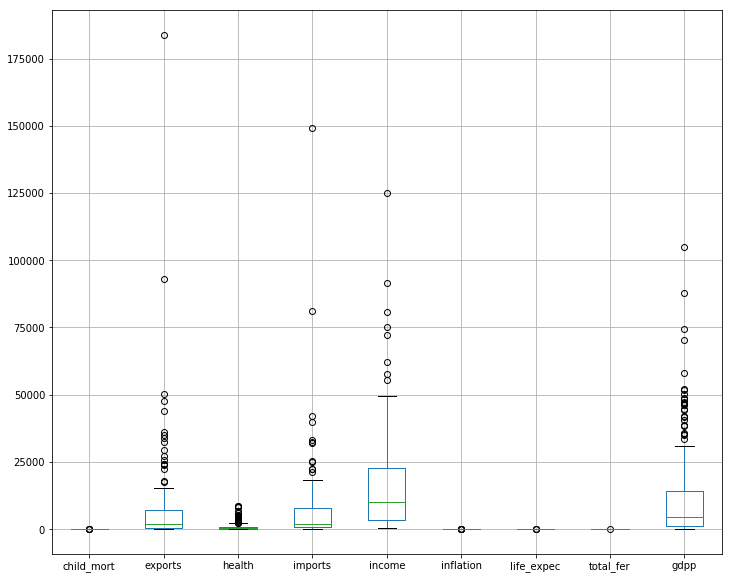

In [16]:
country_numeric.boxplot(figsize=(12,10))

#So we will check for each variable alone and will start removing outliers

## Step 3 : PCA

In [17]:
colms = list(country_numeric.columns)

In [18]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_numeric = standard_scaler.fit_transform(country_numeric)

In [19]:
from sklearn.decomposition  import PCA
pca= PCA(svd_solver='randomized', random_state=100)

In [20]:
pca.fit(country_numeric)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

In [21]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [22]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

#### Here we can se that most of the data is explained by 2 PCA components. 

### Let's plot the scree plot to explore further

In [23]:
pc_df = pd.DataFrame({'PC1':pca.components_[0] , 'PC2':pca.components_[1] ,'PC3':pca.components_[2] , 'Feature' : colms})
pc_df

PC1       PC2       PC3     Feature
0 -0.316392  0.476267 -0.150012  child_mort
1  0.342887  0.397311 -0.030574     exports
2  0.358535  0.155053 -0.075703      health
3  0.344865  0.370781 -0.072174     imports
4  0.380041  0.128384  0.145764      income
5 -0.143085  0.221261  0.948419   inflation
6  0.343857 -0.369820  0.196752  life_expec
7 -0.302842  0.459715 -0.077834   total_fer
8  0.399988  0.200624  0.010339        gdpp

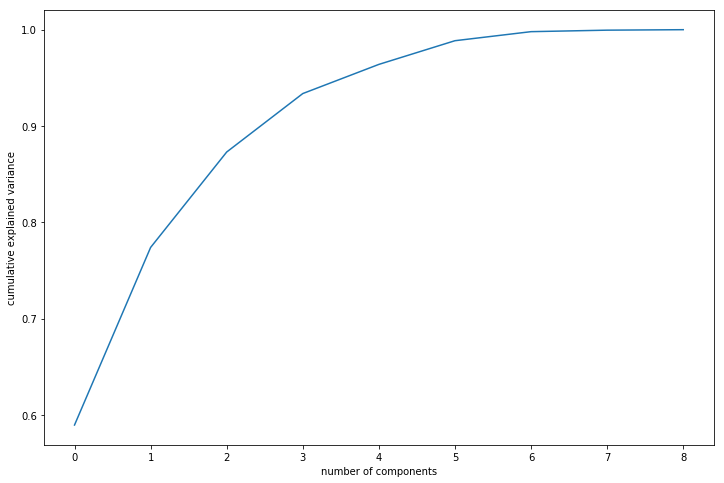

In [24]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Thus we can infer from the above plot the 90% of the data can be explained by 3 components

In [25]:
colnames = list(country.drop('country',axis=1).columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pcs_df

Feature       PC1       PC2       PC3
0  child_mort -0.316392  0.476267 -0.150012
1     exports  0.342887  0.397311 -0.030574
2      health  0.358535  0.155053 -0.075703
3     imports  0.344865  0.370781 -0.072174
4      income  0.380041  0.128384  0.145764
5   inflation -0.143085  0.221261  0.948419
6  life_expec  0.343857 -0.369820  0.196752
7   total_fer -0.302842  0.459715 -0.077834
8        gdpp  0.399988  0.200624  0.010339

Let's plot them to get a better idea about which variables are well explained by these 3 components. We'll use only the first 2 PCs here and check their variance.

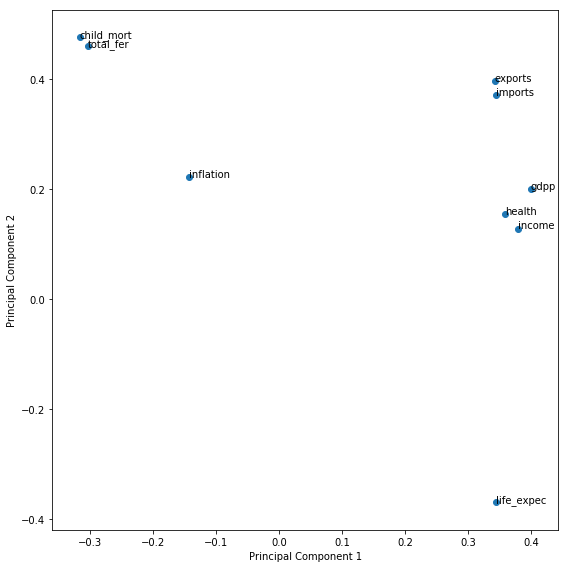

In [26]:
#Let's visualise the first 2 components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [27]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [34]:
#let's project our original data on the 3 principal components
df_country_numeric_pca = pca_final.fit_transform(country_numeric)
df_country_numeric_pca.shape

(167, 3)

In [35]:
#creating correlation matrix for the principal components
pc = np.transpose(df_train_pca)
pc

array([[-2.63744157e+00, -2.22769569e-02, -4.57626261e-01,
        -2.72452030e+00,  6.49848516e-01,  3.71968554e-02,
        -3.32691520e-01,  3.18036154e+00,  3.81568156e+00,
        -4.67515152e-01,  1.49875246e+00,  1.47097104e+00,
        -1.01419903e+00,  8.45238116e-01, -1.34473920e-02,
         3.96087770e+00, -4.02707071e-01, -2.36598657e+00,
        -7.14998191e-01, -1.01778054e+00,  2.52812687e-01,
        -1.13095912e+00,  1.66280202e-01,  2.69525065e+00,
         2.80569006e-01, -2.75387449e+00, -2.76406823e+00,
        -1.17929406e+00, -2.44142939e+00,  3.39411994e+00,
        -5.23229456e-01, -3.24153046e+00, -3.18889212e+00,
         6.92394286e-01, -1.28851026e-01, -1.38822916e-02,
        -1.94991207e+00, -3.11679859e+00, -2.04776384e+00,
         4.31523541e-01, -2.57476033e+00,  8.46278142e-01,
         2.31379384e+00,  1.67463303e+00,  4.37600084e+00,
        -3.67788028e-01, -3.02658561e-01, -8.36646810e-01,
        -3.36572123e-01, -1.05577406e+00, -1.94848965e+0

In [36]:
#Let's create the newer matrix according to the given principal components
rownames = list(country['country'])
pcs_df2 = pd.DataFrame({'country':rownames,'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})
pcs_df2.head()

country       PC1       PC2       PC3
0          Afghanistan -2.637442  1.469038 -0.541359
1              Albania -0.022277 -1.431896 -0.020701
2              Algeria -0.457626 -0.673301  0.961867
3               Angola -2.724520  2.174583  0.606687
4  Antigua and Barbuda  0.649849 -1.024374 -0.250103

In [37]:
df_country_numeric_pca=pd.DataFrame(df_country_numeric_pca)
final_df=pd.concat([df_country_numeric_pca , cx ] , axis=1)
final_df_num=final_df.select_dtypes(['int64', 'float64'])

### Outlier detection for PCA components

In [39]:
final_df_num.describe(percentiles=[.25,.5,.75,.90,.95,.99])

0             1             2
count  1.670000e+02  1.670000e+02  1.670000e+02
mean   2.127373e-17  1.329608e-18  2.925139e-17
std    2.310042e+00  1.292295e+00  9.467202e-01
min   -3.944960e+00 -1.696969e+00 -1.791111e+00
25%   -1.446673e+00 -9.783466e-01 -3.974440e-01
50%   -3.567044e-01 -3.984503e-01 -1.740323e-01
75%    8.505467e-01  6.782430e-01  2.604698e-01
90%    2.975462e+00  1.586252e+00  9.557187e-01
95%    3.917319e+00  2.171455e+00  1.191825e+00
99%    6.374115e+00  3.302818e+00  3.062770e+00
max    1.264435e+01  8.265266e+00  7.866491e+00

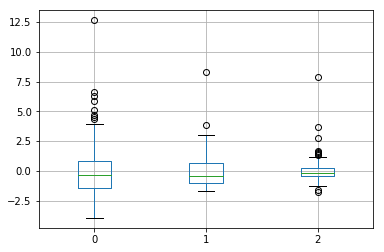

In [40]:
final_df.boxplot()

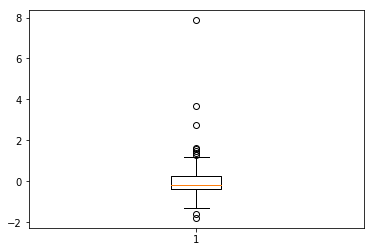

In [41]:
plt.boxplot(final_df[2])
Q1 = final_df[2].quantile(0.25)
Q3 = final_df[2].quantile(0.75)
IQR = Q3 - Q1
final_df = final_df[(final_df[2] >= Q1 - 1.5*IQR) & (final_df[2] <= Q3 + 1.5*IQR)]

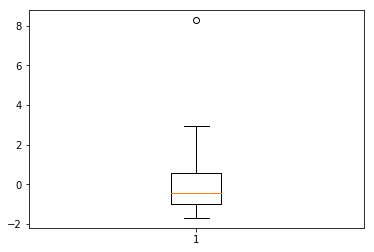

In [42]:
plt.boxplot(final_df[1])
Q1 = final_df[1].quantile(0.25)
Q3 = final_df[1].quantile(0.75)
IQR = Q3 - Q1
final_df = final_df[(final_df[1] >= Q1 - 1.5*IQR) & (final_df[1] <= Q3 + 1.5*IQR)]

(156, 4)


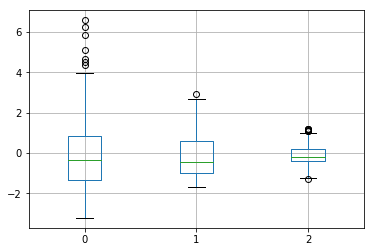

In [44]:
final_df.boxplot()
print(final_df.shape)
final_df_num=final_df.select_dtypes(['int64', 'float64'])

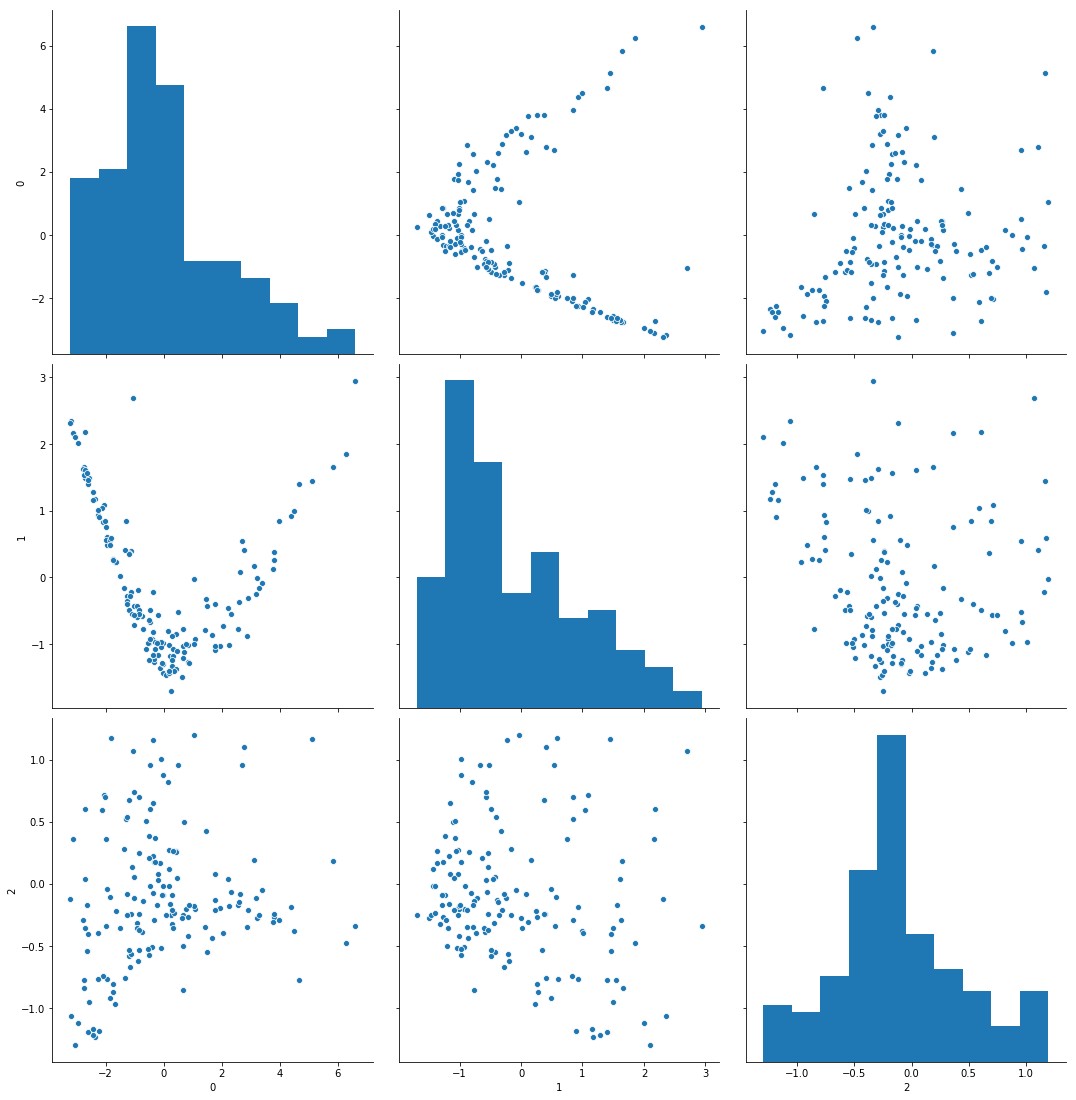

In [45]:
g=sns.pairplot(final_df_num,height=10, aspect=0.5)
g.fig.set_size_inches(15,15)
plt.show()

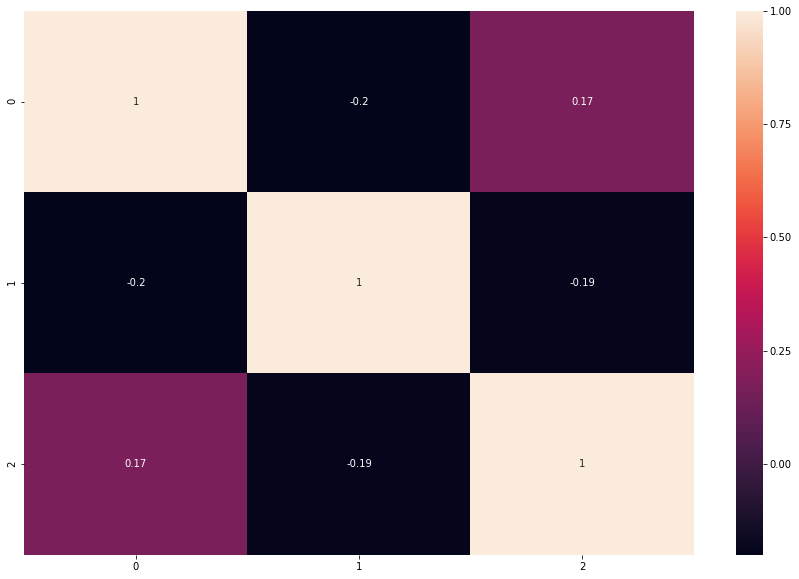

In [46]:
#plotting the correlation matrix
%matplotlib inline
corrmat = np.corrcoef(final_df_num.transpose())
plt.figure(figsize = (15,10))
sns.heatmap(corrmat,annot = True)


### Applying K means

In [48]:
# let's check hopkins score for the final data-set

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [49]:
hopkins(final_df_num)

0.8448649702116833

It looks like an appropriate score for Data Clustering

In [50]:
# Silhoutte analysis for finding the cluster numbers
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(final_df_num)
    sse_.append([k, silhouette_score(final_df_num, kmeans.labels_)])

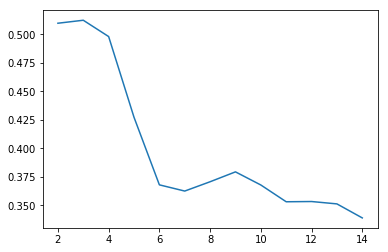

In [51]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Selecting 5 Cluster for the Kmeans

In [53]:
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(final_df_num)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
#assigning clusters to the PCA data-set
final_df.index = pd.RangeIndex(len(final_df.index))
RFM_kmn = pd.concat([final_df, pd.Series(model_clus5.labels_)], axis=1)
RFM_kmn.columns =[0, 1, 2, 'country', 'ClusterID']

In [56]:
# creating a merged data-frame which has PCA components with the initial data-set
RFM_kmn['country']=RFM_kmn['country'].apply(lambda x : x.lower())
country['country']=country['country'].apply(lambda x : x.lower())
final_df['country']=final_df['country'].apply(lambda x : x.lower())
merged_df=pd.merge(RFM_kmn , country , on ='country' , how='inner')

In [57]:
# assigning clusters to initial country data-set
country.index = pd.RangeIndex(len(country.index))
KM_df = pd.concat([country, pd.Series(model_clus5.labels_)], axis=1)
KM_df.columns =['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']

In [58]:
# Detecting outlier countries
outlier_countries=country[pd.isnull(KM_df['ClusterID'])]

### Analyzing the Cluster

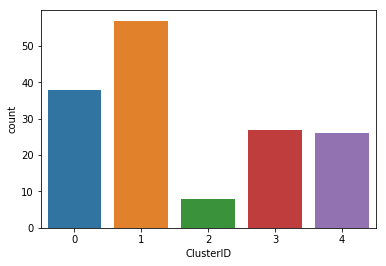

In [60]:
sns.countplot(data=RFM_kmn , x='ClusterID')
plt.show()

### Analyzing clusters based on initial variables

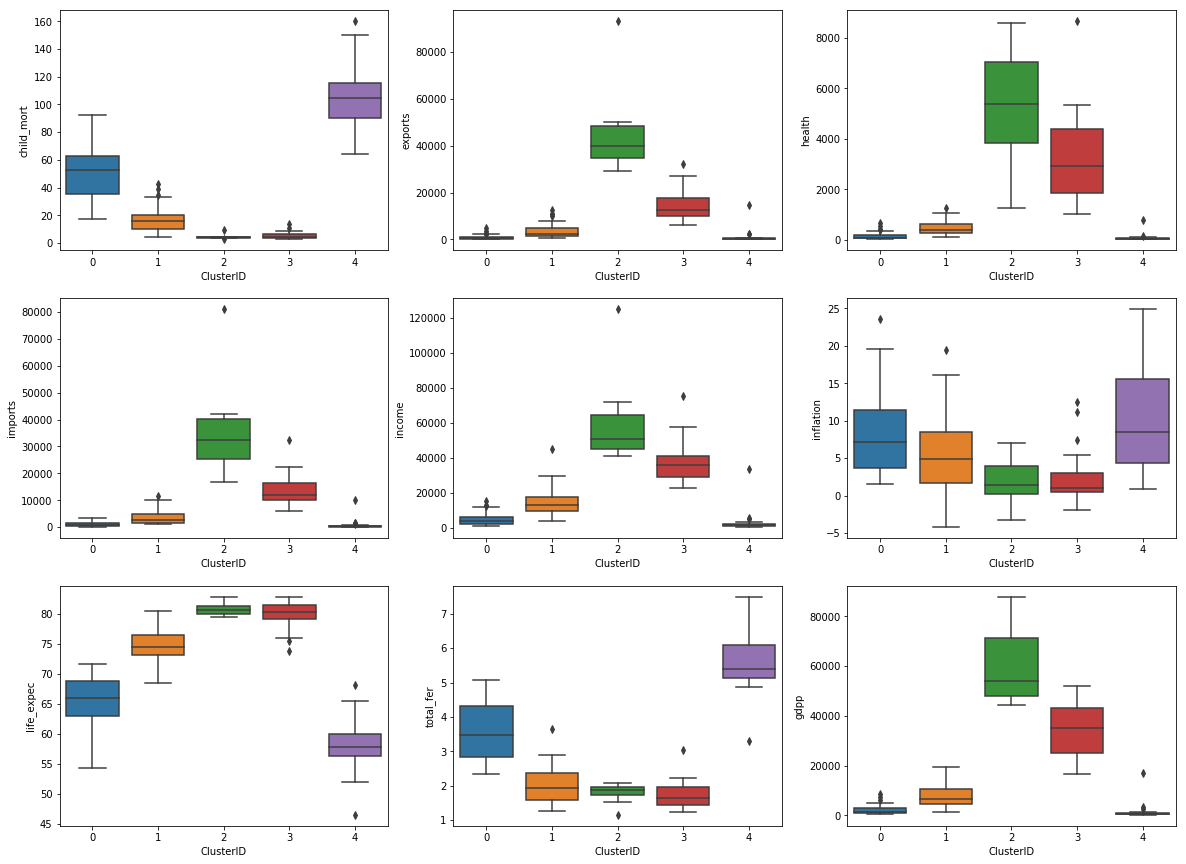

In [62]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='ClusterID', y='child_mort', data=merged_df)
plt.subplot(3,3,2)
sns.boxplot(x='ClusterID', y='exports', data=merged_df)
plt.subplot(3,3,3)
sns.boxplot(x='ClusterID', y='health', data=merged_df)
plt.subplot(3,3,4)
sns.boxplot(x='ClusterID', y='imports', data=merged_df)
plt.subplot(3,3,5)
sns.boxplot(x='ClusterID', y='income', data=merged_df)
plt.subplot(3,3,6)
sns.boxplot(x='ClusterID', y='inflation', data=merged_df)
plt.subplot(3,3,7)
sns.boxplot(x='ClusterID', y='life_expec', data=merged_df)
plt.subplot(3,3,8)
sns.boxplot(x='ClusterID', y='total_fer', data=merged_df)
plt.subplot(3,3,9)
sns.boxplot(x='ClusterID', y='gdpp', data=merged_df)
plt.show()

### Analyzing clusters based on PCA components

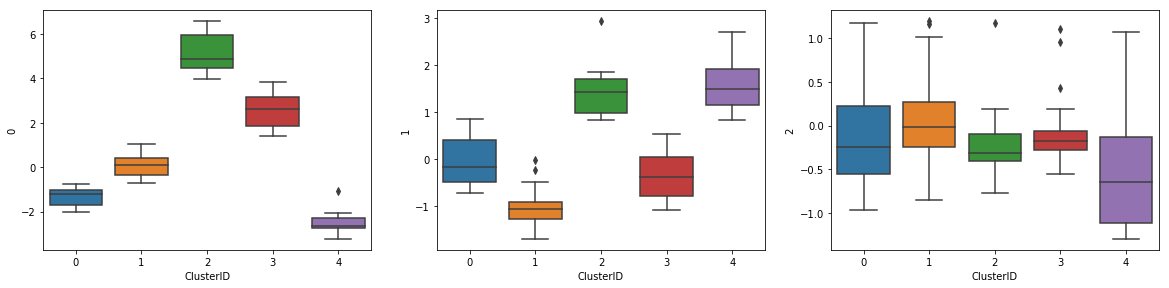

In [65]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='ClusterID', y=0, data=merged_df)
plt.subplot(3,3,2)
sns.boxplot(x='ClusterID', y=1, data=merged_df)
plt.subplot(3,3,3)
sns.boxplot(x='ClusterID', y=2, data=merged_df)
plt.show()

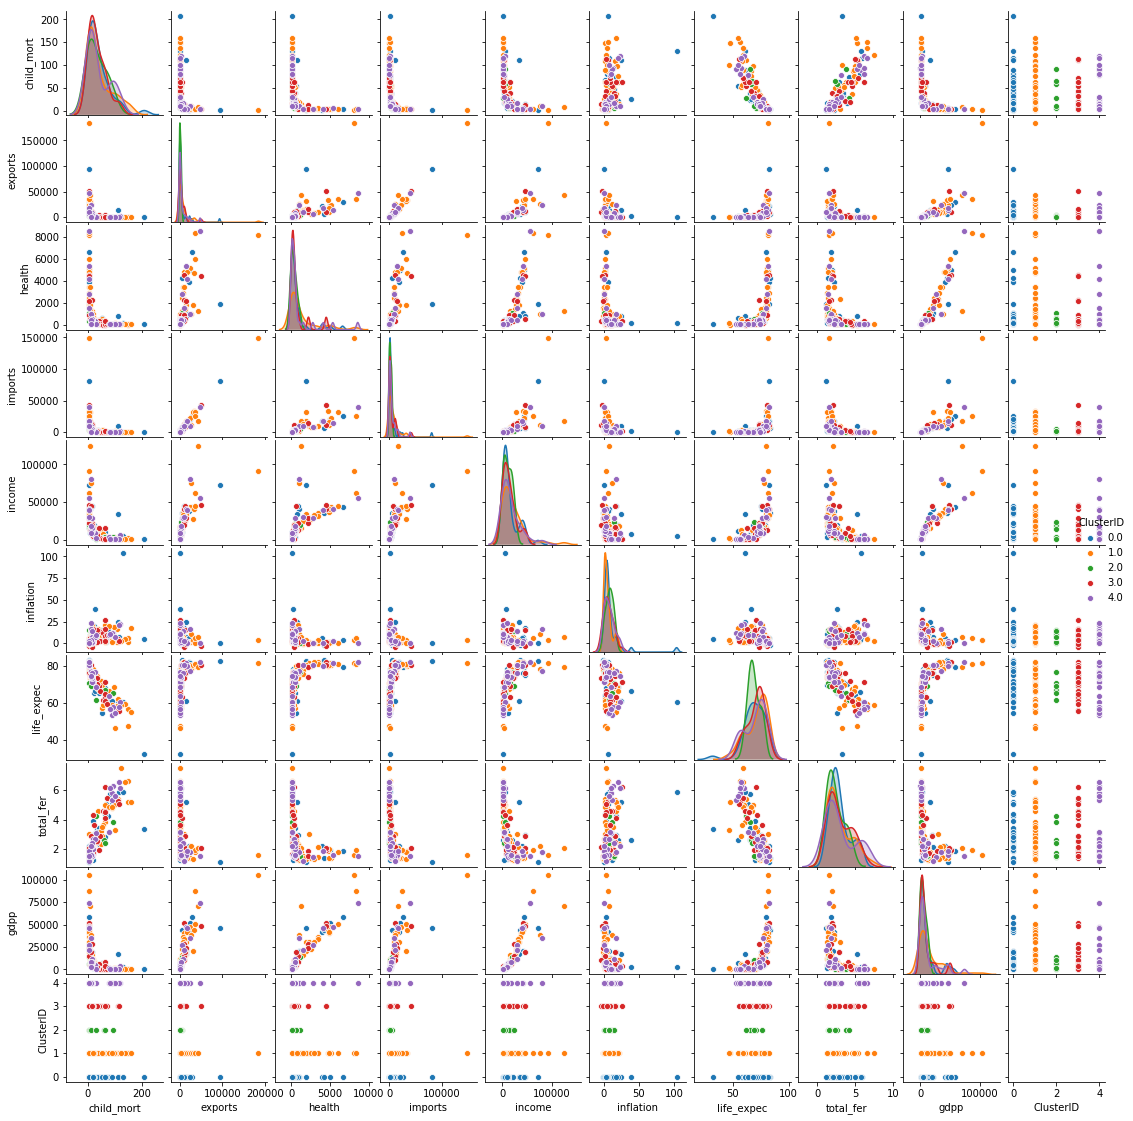

In [66]:
g=sns.pairplot(KM_df,height=10, aspect=0.5 , hue='ClusterID')
g.fig.set_size_inches(15,15)
plt.show()

### Applying Heirarchical Clustering

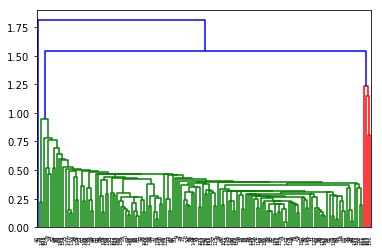

In [68]:
# heirarchical clustering using single method
mergings = linkage(final_df_num, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [70]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
RFM_hc1 = pd.concat([final_df, clusterCut], axis=1)
RFM_hc1.columns =[0, 1, 2,  'country', 'ClusterID']

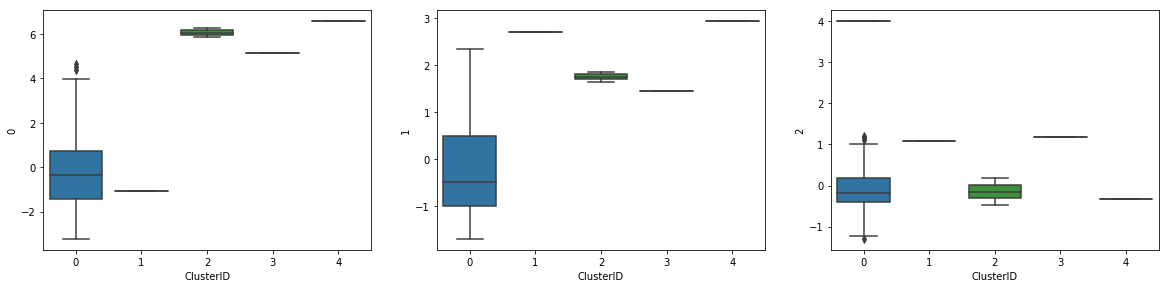

In [72]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='ClusterID', y=0, data=RFM_hc1)
plt.subplot(3,3,2)
sns.boxplot(x='ClusterID', y=1, data=RFM_hc1)
plt.subplot(3,3,3)
sns.boxplot(x='ClusterID', y=2, data=RFM_hc1)

sns.boxplot(x='ClusterID', y=4, data=RFM_hc1)

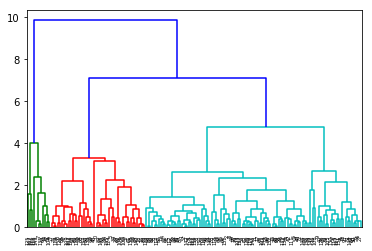

In [73]:
# heirarchical clustering using complete method
mergings = linkage(final_df_num, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [75]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
RFM_hc1 = pd.concat([final_df, clusterCut], axis=1)
RFM_hc1.columns =[0, 1, 2, 'country', 'ClusterID']

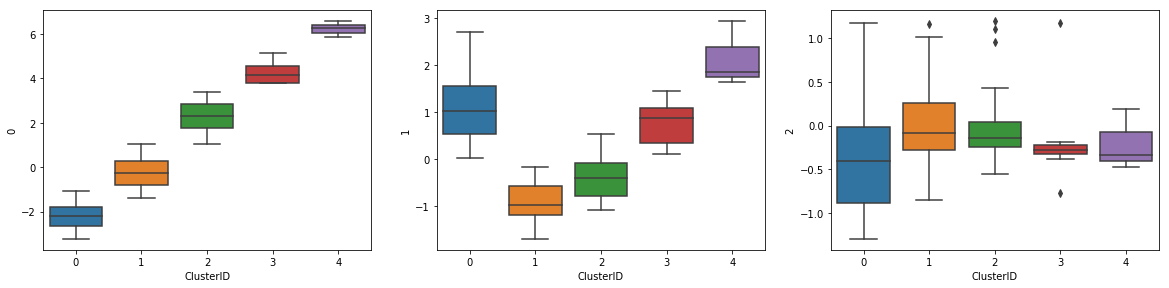

In [79]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='ClusterID', y=0, data=RFM_hc1)
plt.subplot(3,3,2)
sns.boxplot(x='ClusterID', y=1, data=RFM_hc1)
plt.subplot(3,3,3)
sns.boxplot(x='ClusterID', y=2, data=RFM_hc1)


In [80]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
RFM_hc2 = pd.concat([country, clusterCut], axis=1)
RFM_hc2.columns =['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']

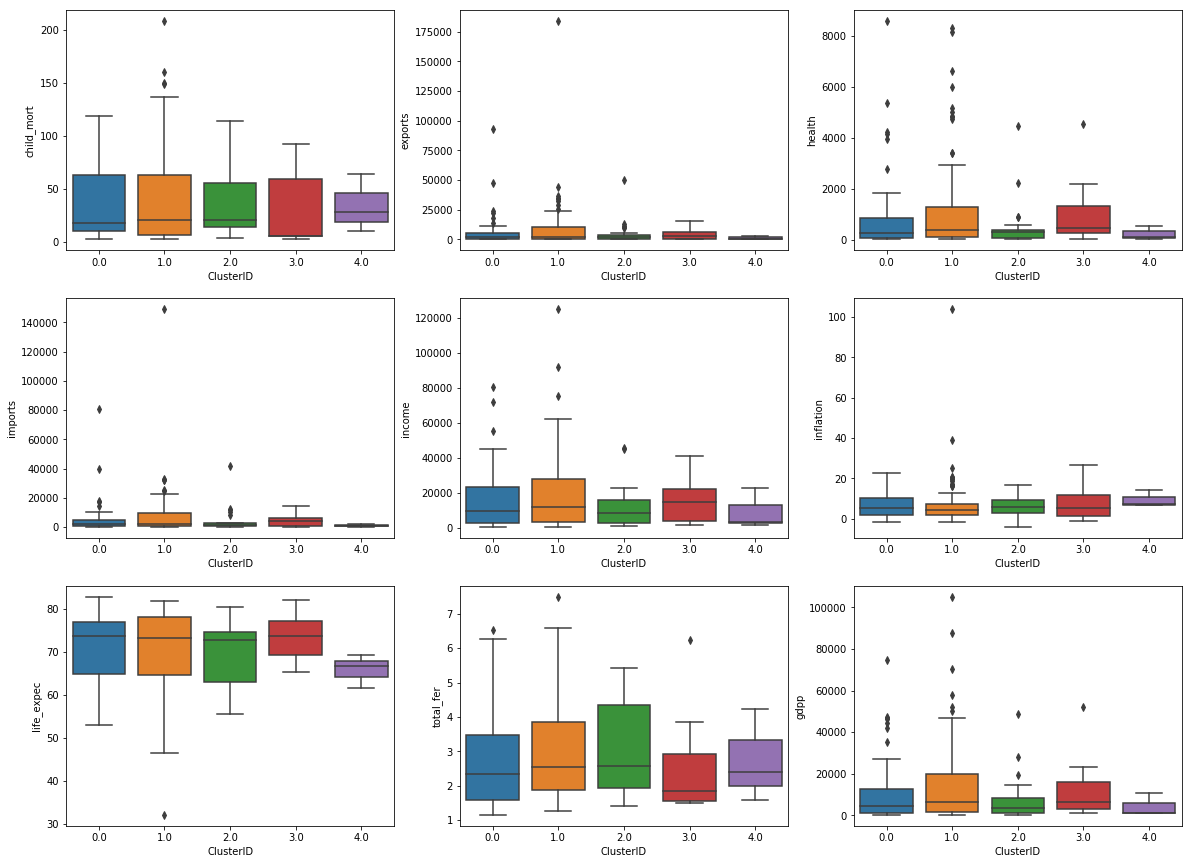

In [81]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='ClusterID', y='child_mort', data=RFM_hc2)
plt.subplot(3,3,2)
sns.boxplot(x='ClusterID', y='exports', data=RFM_hc2)
plt.subplot(3,3,3)
sns.boxplot(x='ClusterID', y='health', data=RFM_hc2)
plt.subplot(3,3,4)
sns.boxplot(x='ClusterID', y='imports', data=RFM_hc2)
plt.subplot(3,3,5)
sns.boxplot(x='ClusterID', y='income', data=RFM_hc2)
plt.subplot(3,3,6)
sns.boxplot(x='ClusterID', y='inflation', data=RFM_hc2)
plt.subplot(3,3,7)
sns.boxplot(x='ClusterID', y='life_expec', data=RFM_hc2)
plt.subplot(3,3,8)
sns.boxplot(x='ClusterID', y='total_fer', data=RFM_hc2)
plt.subplot(3,3,9)
sns.boxplot(x='ClusterID', y='gdpp', data=RFM_hc2)
plt.show()

### Cluster selection for Problem statement

In [84]:
km_clusters_child_mort = 	pd.DataFrame(merged_df.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(merged_df.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(merged_df.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(merged_df.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(merged_df.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(merged_df.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(merged_df.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(merged_df.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(merged_df.groupby(["ClusterID"]).gdpp.mean())

In [85]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_child_mort, km_clusters_exports, km_clusters_health ,km_clusters_imports, 
                km_clusters_income , km_clusters_inflation , km_clusters_life_expec ,km_clusters_total_fer, km_clusters_gdpp]
               , axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean" , "imports_mean" , "income_mean" , 
              "inflation_mean"  , "life_expec_mean" , "total_fer_mean" , "gdpp_mean"]
df.head()

ClusterID  child_mort_mean  exports_mean  health_mean  imports_mean  \
0          0        50.481579    880.094219   141.126345   1018.011897   
1          1        16.273684   3429.556491   479.611912   3578.774211   
2          2         4.600000  46148.262500  5230.532500  36896.412500   
3          3         5.322222  14504.025926  3249.133704  13650.455556   
4          4       104.507692    923.082046    76.155192    779.279462   

    income_mean  inflation_mean  life_expec_mean  total_fer_mean     gdpp_mean  
0   5126.315789        8.396842        65.602632        3.554211   2352.789474  
1  14247.192982        5.930684        74.535088        2.009474   7419.824561  
2  61400.000000        1.991125        80.750000        1.782500  60087.500000  
3  37170.370370        2.204556        79.777778        1.749259  34696.296296  
4   3189.038462       10.104038        57.880769        5.557692   1510.769231

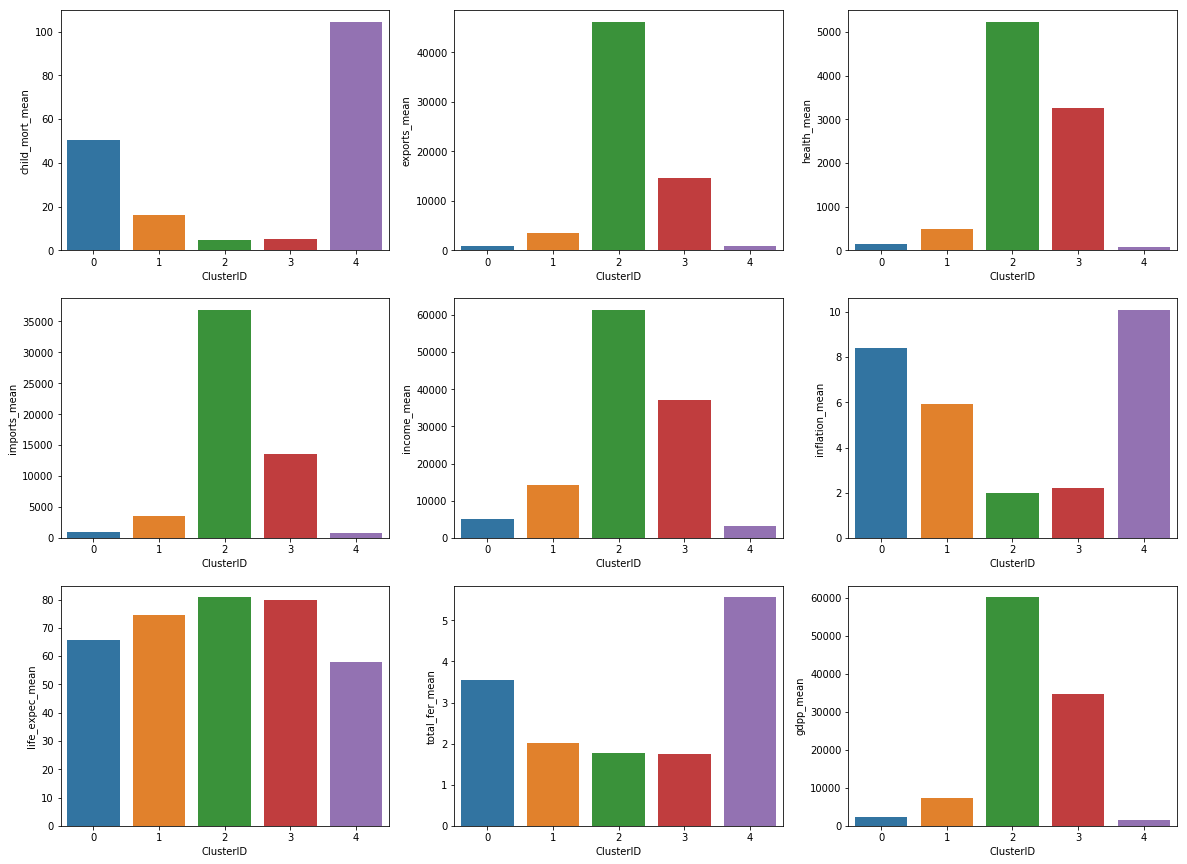

In [86]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.barplot(x='ClusterID', y='child_mort_mean', data=df)
plt.subplot(3,3,2)
sns.barplot(x='ClusterID', y='exports_mean', data=df)
plt.subplot(3,3,3)
sns.barplot(x='ClusterID', y='health_mean', data=df)
plt.subplot(3,3,4)
sns.barplot(x='ClusterID', y='imports_mean', data=df)
plt.subplot(3,3,5)
sns.barplot(x='ClusterID', y='income_mean', data=df)
plt.subplot(3,3,6)
sns.barplot(x='ClusterID', y='inflation_mean', data=df)
plt.subplot(3,3,7)
sns.barplot(x='ClusterID', y='life_expec_mean', data=df)
plt.subplot(3,3,8)
sns.barplot(x='ClusterID', y='total_fer_mean', data=df)
plt.subplot(3,3,9)
sns.barplot(x='ClusterID', y='gdpp_mean', data=df)
plt.show()

For a country which has low income and GDP per capita, that will pull our attention first. Keeping that in mind, let's focus on Cluster 0 and see the health factors as well. 
- The life expectancy is also between 50-60 on an average.  
- This cluster has invested 7% of total GDP on health sector only. 
- It has low income and low GDP per capita
- Also the inflation rate in that cluster is high.
- Child mortality death numbers are high

In [88]:
cluster_df=merged_df[merged_df['ClusterID']==0]
cluster_df.country

11                bangladesh
18                   bolivia
20                  botswana
25                  cambodia
33                   comoros
44                     egypt
47                   eritrea
49                      fiji
52                     gabon
56                     ghana
59                 guatemala
62                    guyana
65                     india
66                 indonesia
68                      iraq
76                     kenya
77                  kiribati
79           kyrgyz republic
80                       lao
88                madagascar
96     micronesia, fed. sts.
101                  myanmar
102                  namibia
103                    nepal
109                 pakistan
113              philippines
119                   rwanda
120                    samoa
121                  senegal
128          solomon islands
129             south africa
133                    sudan
137               tajikistan
141                    tonga
144           

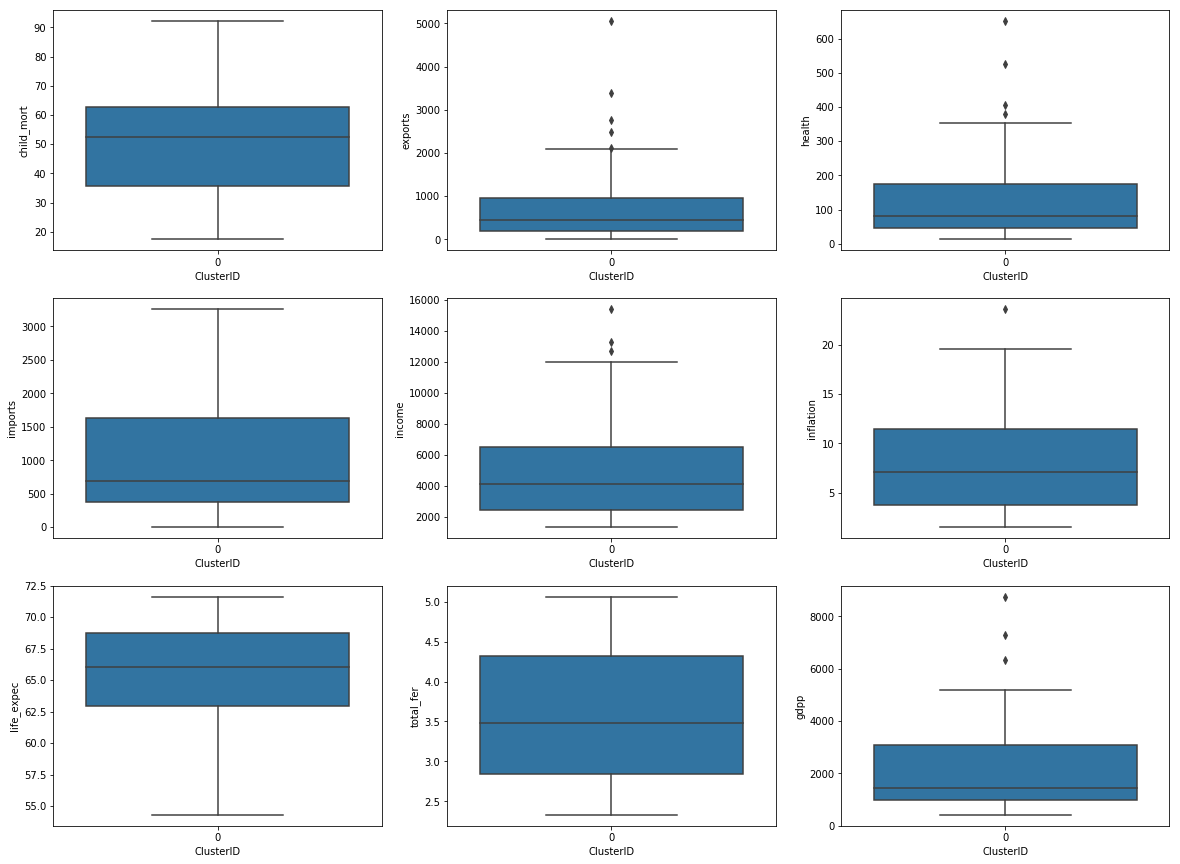

In [89]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='ClusterID', y='child_mort', data=cluster_df)
plt.subplot(3,3,2)
sns.boxplot(x='ClusterID', y='exports', data=cluster_df)
plt.subplot(3,3,3)
sns.boxplot(x='ClusterID', y='health', data=cluster_df)
plt.subplot(3,3,4)
sns.boxplot(x='ClusterID', y='imports', data=cluster_df)
plt.subplot(3,3,5)
sns.boxplot(x='ClusterID', y='income', data=cluster_df)
plt.subplot(3,3,6)
sns.boxplot(x='ClusterID', y='inflation', data=cluster_df)
plt.subplot(3,3,7)
sns.boxplot(x='ClusterID', y='life_expec', data=cluster_df)
plt.subplot(3,3,8)
sns.boxplot(x='ClusterID', y='total_fer', data=cluster_df)
plt.subplot(3,3,9)
sns.boxplot(x='ClusterID', y='gdpp', data=cluster_df)
plt.show()

In [ ]:
cluster_df

Looking at this data-frame, countries in this cluster have very low income and very low GDP per capita. The child_mort number is high compared to other cluster countries as well has imports are greater than export. Thus Company should consider countries of this cluster for their future investements.

In [92]:
outlier_countries

country  child_mort   exports    health   imports  income  \
156               ukraine        11.7   1398.87   229.284   1517.67    7820   
157  united arab emirates         8.6  27195.00  1281.000  22260.00   57600   
158        united kingdom         5.2  10969.80  3749.960  11981.20   36200   
159         united states         7.3   6001.60  8663.600   7647.20   49400   
160               uruguay        10.6   3129.70   993.650   3022.60   17100   
161            uzbekistan        36.3    437.46    80.178    393.30    4240   
162               vanuatu        29.2   1384.02   155.925   1565.19    2950   
163             venezuela        17.1   3847.50   662.850   2376.00   16500   
164               vietnam        23.3    943.20    89.604   1050.62    4490   
165                 yemen        56.3    393.00    67.858    450.64    4480   
166                zambia        83.1    540.20    85.994    451.14    3280   

     inflation  life_expec  total_fer   gdpp  
156      13.40        70.4       1.44   2970  
157      12.50        76.5       1.87  35000  
158       1.57        80.3       1.92  38900  
159       1.22        78.7       1.93  48400  
160       4.91        76.4       2.08  11900  
161      16.50        68.8       2.34   1380  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460

Few of the outlier countries are related to very high income and GDP per capita and others are vice-versa